<a href="https://colab.research.google.com/github/Swara-24/Explainable-AI/blob/main/Colab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Counterfactual explanations

> Indented block



In [ ]:
pip install ceml

  Using cached https://files.pythonhosted.org/packages/31/43/741f8d660b718249e261fbe008845ca31275c79eb3b60d1c501f3263408b/ceml-0.4.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/13/70/54e9fb010fe1547bc4774716f11ececb81ae5b306c05f090f4461ee13205/torch-1.5.0-cp36-cp36m-manylinux1_x86_64.whl
     |████████████████████████████████| 7.1MB 6.4MB/s 
  Using cached https://files.pythonhosted.org/packages/97/0d/00779b66ee6b8c10b2ece1eeba9ff1c64b1289a71d60e1bbe68f4db2a702/jax-0.1.39.tar.gz
  Using cached https://files.pythonhosted.org/packages/b4/30/6eccf2333854e42591697e1950b1925384cb4080f302b1ddd11cd8103dd9/cvxpy-1.0.24.tar.gz
     |████████████████████████████████| 17.3MB 232kB/s 
  Using cached https://files.pythonhosted.org/packages/3d/68/897c8632a50d56834858374ad6e37f9dbf0d49eb801c994bcd4c441c87c6/jaxlib-0.1.21-cp36-none-manylinux1_x86_64.whl
  Created wheel for jax: filename=jax-0.1.39-cp36-none-any.whl size=224387 sha256=9f4898f12e76890027524ee4a844c4b5ba2cd577

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from ceml.sklearn import generate_counterfactual
import pandas as pd

In [ ]:
data = load_iris()
X=data.data
y=data.target
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)#random state is kept 0 to freeze the outcome. Otherwise, everytime the program is executed, 
#train test split will be different so, the output will get changed and hence the interpretation.


In [ ]:
data.feature_names #all features can be changed

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Example 1: Printing the original values.

In [ ]:
val_X=pd.DataFrame(X_test)

In [ ]:
x = X_test[1,:]
print("Original values :",x)
print("Prediction on x: {}".format(model.predict([x])))

Original values : [6.  2.2 4.  1. ]
Prediction on x: [1]


Computing counterfactual

In [ ]:
print("\nValues after computing counterfactual ....")
exp=generate_counterfactual(model, x, y_target=0, features_whitelist=None)
print("New outcome :0")
exp_df=pd.DataFrame(exp,columns=('x_cf','delta'))
exp_df.head()


Values after computing counterfactual ....
New outcome :0


/usr/local/lib/python3.6/dist-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


,x_cf,delta
0,6.00000,0.00000
1,2.20000,0.00000
2,4.00000,0.00000
3,0.79999,0.20001


In [ ]:
print("\nValues after computing counterfactual ....")
exp=generate_counterfactual(model, x, y_target=2, features_whitelist=None)
print("New outcome :2")
exp_df=pd.DataFrame(exp,columns=('x_cf','delta'))
exp_df.head()


Values after computing counterfactual ....
New outcome :2


,x_cf,delta
0,6.00000,0.00000
1,2.20000,0.00000
2,4.00000,0.00000
3,1.65001,-0.65001


Example 2: Printing the original values

In [ ]:
x = X_test[2,:]
print("Original values :",x)
print("Prediction on x: {}".format(model.predict([x])))

Original values : [5.5 4.2 1.4 0.2]
Prediction on x: [0]


In [ ]:
print("\nValues after computing counterfactual ....")
exp=generate_counterfactual(model, x, y_target=1, features_whitelist=None)
print("New outcome :1")
exp_df=pd.DataFrame(exp,columns=('x_cf','delta'))
exp_df.head()


Values after computing counterfactual ....
New outcome :1


,x_cf,delta
0,5.50000,0.00000
1,4.20000,0.00000
2,1.40000,0.00000
3,0.80001,-0.60001


In [ ]:
print("\nValues after computing counterfactual ....")
exp=generate_counterfactual(model, x, y_target=2, features_whitelist=None)
print("New outcome :2")
exp_df=pd.DataFrame(exp,columns=('x_cf','delta'))
exp_df.head()


Values after computing counterfactual ....
New outcome :2


,x_cf,delta
0,5.50000,0.00000
1,4.20000,0.00000
2,1.40000,0.00000
3,1.65001,-1.45001


INTERPRETATION -

To change the outcome, the feature's values are changed which is shown by the column delta. Delta = Original value - new value i.e. the value of delta when added to new value will give the original value.

We have considered 2 examples here - the 1st and 2nd test records.

Example 1- The original outcome is 1. The first 3 values remain the same and 0.2 is subtracted from the 4th value(petal width)  to get the outcome 0. Similarly, 0.65 is added to 4th value(petal width) to get outcome as 2.

Example 2- The original outcome is 0. To change the outcome to 1 and 2, 0.6 and 1.45 are added to the petal width respectively. 

Thus, we can see different outcomes -'setosa', 'versicolor', 'virginica' by changing the features.

# Adversarial Examples

Step 1: Storing the image to be read. tensorflow is used for the whole process.

In [ ]:
import tensorflow as tf
import skimage.io 

In [ ]:
Xi = skimage.io.imread("https://www.data-imaginist.com/assets/images/kitten.jpg") #link for image to be read

Step 2: Preprocessing the images. The image is converted to tensor, resized and preprocessed for mobilenet_v2 .

In [ ]:
image = tf.cast(Xi, tf.float32)
image = tf.image.resize(image, (224, 224))
image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
image = image[None, ...]

Step 3: Mobilenet v2 initialisation. The predicted output(preds) is a vector of 1000 probabilities for each class available.

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True, weights='imagenet')
pretrained_model.trainable = False

14540800/14536120 [==============================] - 0s 0us/step


Step 4: Predict class of input image using Mobilenet v2 model.

In [ ]:
image_probs = pretrained_model.predict(image)

In [ ]:
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions
print(decode_predictions(image_probs))

40960/35363 [==================================] - 0s 0us/step
[[('n02123159', 'tiger_cat', 0.33979255), ('n02124075', 'Egyptian_cat', 0.18349908), ('n02123045', 'tabby', 0.07072176), ('n04493381', 'tub', 0.04454533), ('n02127052', 'lynx', 0.030665321)]]


The description of these classes is shown and it can be seen that the "tiger cat" is the top class for the given image with the max probability of 0.339.

Step 5: Extracting labels

In [ ]:
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

Step 6: Displaying the image with the image label and confidence level(i.e. the probability that it contains the label)

In [ ]:
import matplotlib.pyplot as plt

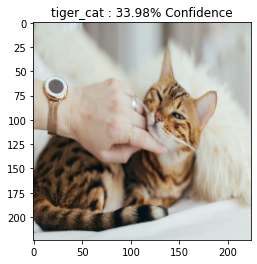

In [ ]:
plt.figure()
plt.imshow(image[0]*0.5+0.5) 
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

Step 7: Using FGSM(Fast Gradient Signed Method) for adversarial images

In [ ]:
# Get the input label of the image.
index = 200
label = tf.one_hot(index, image_probs.shape[-1]) #one hot encoded array with only index 200 as 1
label = tf.reshape(label, (1, image_probs.shape[-1])) # reshaping the array to (1,1000) which is the shape of image probabilities

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
#function to create the perturbations.
def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image) #recording operations on tensor
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  print(loss)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

Adversarial pattern is created by recording the loss using the label, then finding the gradient wrt. image and obtaining the sign of the gradient.

tf.Tensor(9.115499, shape=(), dtype=float32)


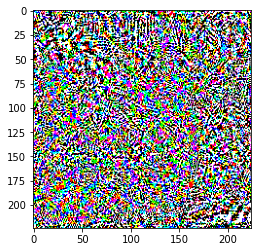

In [ ]:
perturbations = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0]*0.5+0.5); 

Step 8: Displaying adversarial images (with decoded label and confidence level)

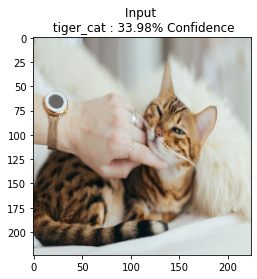

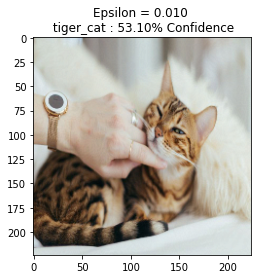

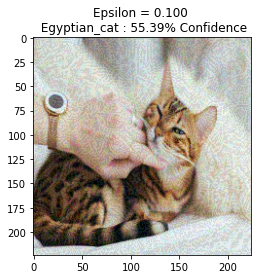

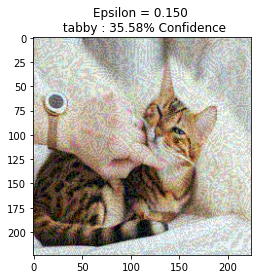

In [ ]:
epsilons = [0, 0.01, 0.1, 0.15] #error
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = image + eps*perturbations
  adv_x = tf.clip_by_value(adv_x, -1, 1)
  _, label, confidence = get_imagenet_label(pretrained_model.predict(adv_x))
  plt.figure()
  plt.imshow(adv_x[0]*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(descriptions[i],
                                                   label, confidence*100))
  plt.show()

INTERPRETATION -

In an adversarial example, a small feature perturbations (error) is added  intentionally that cause a machine learning model to make a false prediction. 
Adversarial image = Input image + Epsilon * Perturbations

Here, it can be seen that -

The first image is the original image with 0 error. On adding a small amount of error (epsilon = 0.01) , the model is fooled to predict the image with more probability. If the epsilon is increased to 0.05 and 0.1, the prediction has changed from tiger cat to egyptian cat(with more confidence level) and tabby respectively.

Thus, the same image with different levels of error is used for prediction multiple times using the same model but the results are different as the model is deceived by the error introduced.

# Prototypes and Criticisms

There are many approaches to find prototypes in the data. One of these is k-means, a clustering algorithm. Any clustering algorithm that returns actual data points as cluster centers would qualify for selecting prototypes. 

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
# Load the dataset
data = load_iris()
iris = pd.DataFrame(data.data)
iris.columns=['sepal_length','sepal_width','petal_length','petal_width']
iris['Class']=data.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
x = iris.iloc[:, [1, 2, 3, 4]].values
y_kmeans = kmeans.fit_predict(x)

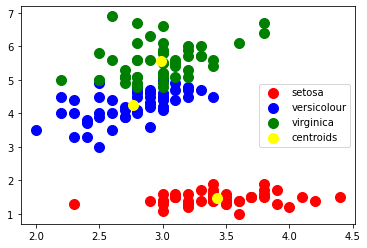

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'virginica')

#Plotting the prototypes of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'centroids')

plt.legend()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(data.data, kmeans.labels_)

0.5111496981090727

INTERPRETATION -

The prototypes are selected to cover the centers of the data distribution and the criticisms are points in a cluster without a prototype. Thus,the clusters of the red, blue and green points where the centroids lie can be considered as the Prototypes.

The small group of points where the density of points is low (which are not a part of any cluster but are important samples) are the Criticisms.

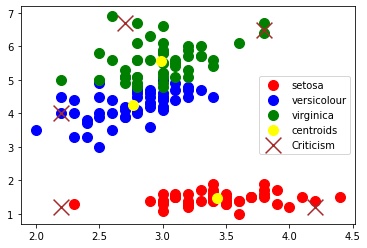

In [ ]:
#MANUALLY PLOTTING THE CRITICISMS
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'virginica')

#Plotting the prototypes of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'centroids')
plt.scatter(3.8, 6.5,marker='x',s=250, c = 'brown', label='Criticism')
plt.scatter(2.2, 4,marker='x',s=250, c = 'brown')
plt.scatter(2.7, 6.7,marker='x',s=250, c = 'brown')
plt.scatter(4.2, 1.2,marker='x',s=250, c = 'brown')
plt.scatter(2.2, 1.2,marker='x',s=250, c = 'brown')
plt.legend()

INTERPRETATION -

Here, the brown points are manually plotted in orer to show the criticisms.
Criticismns are selected from the data points of regions that are not well explained by the prototypes.

# Influential Instances

Ordinary least squares (OLS) is a method that defines the relationship between one or more independent variables and a dependent variable. It minimizes the sum of the squares in the difference between the observed and predicted values of the dependent variable.

For example, let us consider the target variable 'class' and the independent variable 'petal width' for analysis.

In [ ]:
from statsmodels.formula.api import ols

m = ols('Class ~ petal_width',data=iris).fit()
print(m.params)

Intercept     -0.232999
petal_width    1.028071
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import scipy.stats as stats
import statsmodels.api as sm

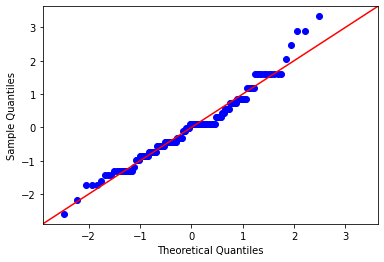

In [ ]:
fig = sm.graphics.qqplot(m.resid, dist=stats.norm, line='45', fit=True)

INTERPRETATION -

This is the Q-Q plot of residuals where plot comes very close to a straight line, except possibly for the upper tail, where we find a couple of residuals somewhat larger than expected.

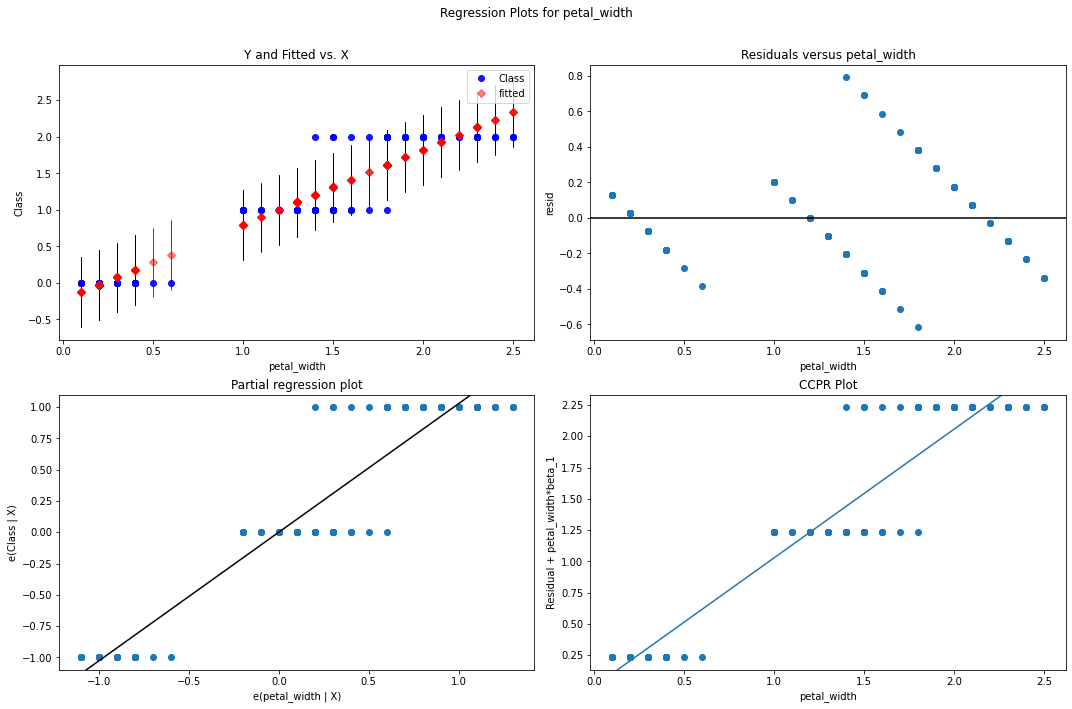

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(m, "petal_width", fig=fig)

INTERPRETATION -

To analyse the global model behaviour and individual predictions, we have drawn the above plots. The etailed explanation is as follows -

When performing a linear classification with only one independent variable, a scatter plot of the target against the independent variable provides a good indication of the nature of the relationship. Since there is more than one variable, this will not work as it does not take into account the effect of the other independent variables in the model.

Thus, Partial residual plots and CCPR plots are used to show the relationship between a given independent variable and the response variable given that other independent variables are also in the model.  

In partial regression plot-
Y = residuals from regressing Y (class of iris) against all the independent variables except petal width
Xi = residuals from regressing petal width against the remaining indpependent variables.

In CCPR plot -
The x axis shows the independent variable(petal width) whereas y axis shows the residuals of model + (regression_coefficient * the independent variable) to show where the fitted line would lie.

The residuals(a measure of how much a regression line vertically misses a data point) are also shown in separate plot.

In [ ]:
infl = m.get_influence()
sm_fr = infl.summary_frame()
sm_fr[:10]

,dfb_Intercept,dfb_petal_width,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.015592,-0.012458,0.000123,0.115314,0.018203,0.015701,0.114929,0.015649
1,0.015592,-0.012458,0.000123,0.115314,0.018203,0.015701,0.114929,0.015649
2,0.015592,-0.012458,0.000123,0.115314,0.018203,0.015701,0.114929,0.015649
3,0.015592,-0.012458,0.000123,0.115314,0.018203,0.015701,0.114929,0.015649
4,0.015592,-0.012458,0.000123,0.115314,0.018203,0.015701,0.114929,0.015649
5,-0.087560,0.064699,0.003995,-0.748907,0.014047,-0.089391,-0.747790,-0.089258
6,-0.039964,0.030817,0.000819,-0.317234,0.016009,-0.040464,-0.316268,-0.040341
7,0.015592,-0.012458,0.000123,0.115314,0.018203,0.015701,0.114929,0.015649
8,0.015592,-0.012458,0.000123,0.115314,0.018203,0.015701,0.114929,0.015649
9,0.079406,-0.065378,0.003173,0.548894,0.020627,0.079658,0.547594,0.079470


The above table contains the data for first 10 samples.

##Deletion diagnostics

## 1. COOK'S DISTANCE

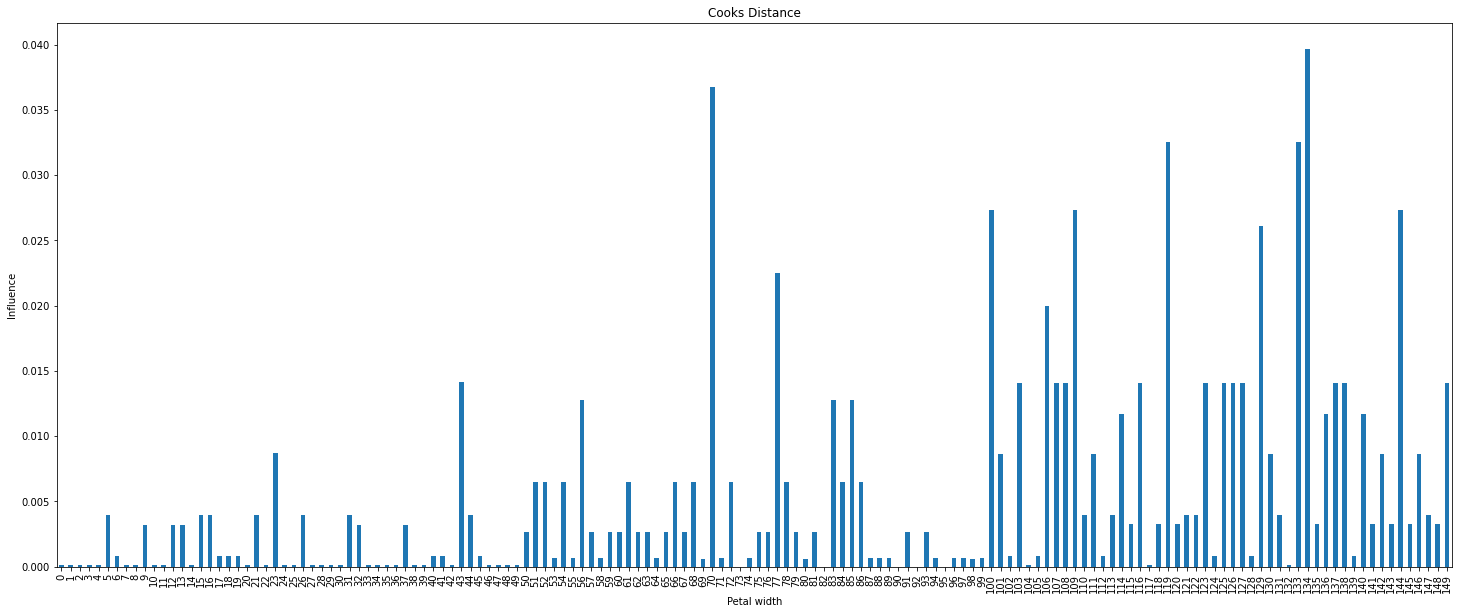

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plt.title("Cooks Distance")
plt.xlabel("Petal width")
plt.ylabel("Influence")
sm_fr.cooks_d.plot.bar()

In [ ]:
print("1. Observations with a cooks distance greater than ",iris['petal_width'].mean()  * 3,"are possible outliers.")
# Here n=no. of observations =150
n=150
print("2. Any point over ",4/n," should be investigated.")
print("3. Any value that sticks out from the other should also be investigated.")

1. Observations with a cooks distance greater than  3.598000000000002 are possible outliers.
2. Any point over  0.02666666666666667  should be investigated.
3. Any value that sticks out from the other should also be investigated.


INTERPRETATION -

The Cooks distance gives us an idea of the effect of deleting a value on model predictions. The values on x axis are instances of petal width and on the y axis is the corresponding influence when the particular instance is removed.

On the basis of the thumb rules printed above, there is no value above 3.59 but there are a number of values over 0.027. 





Removing the outliers and producing a new dataframe -

In [ ]:
iris[(sm_fr.cooks_d>0.0267)].nunique

<bound method DataFrame.nunique of      sepal_length  sepal_width  petal_length  petal_width  Class
70            5.9          3.2           4.8          1.8      1
100           6.3          3.3           6.0          2.5      2
109           7.2          3.6           6.1          2.5      2
119           6.0          2.2           5.0          1.5      2
133           6.3          2.8           5.1          1.5      2
134           6.1          2.6           5.6          1.4      2
144           6.7          3.3           5.7          2.5      2>

In [ ]:
iris_new1 = iris[(sm_fr.cooks_d)<=0.0267]
iris_new1

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


INTERPRETATION -
The new dataframe contains 143 rows which means that the 7 outliers which were present are now removed.

## 2. DFFITS

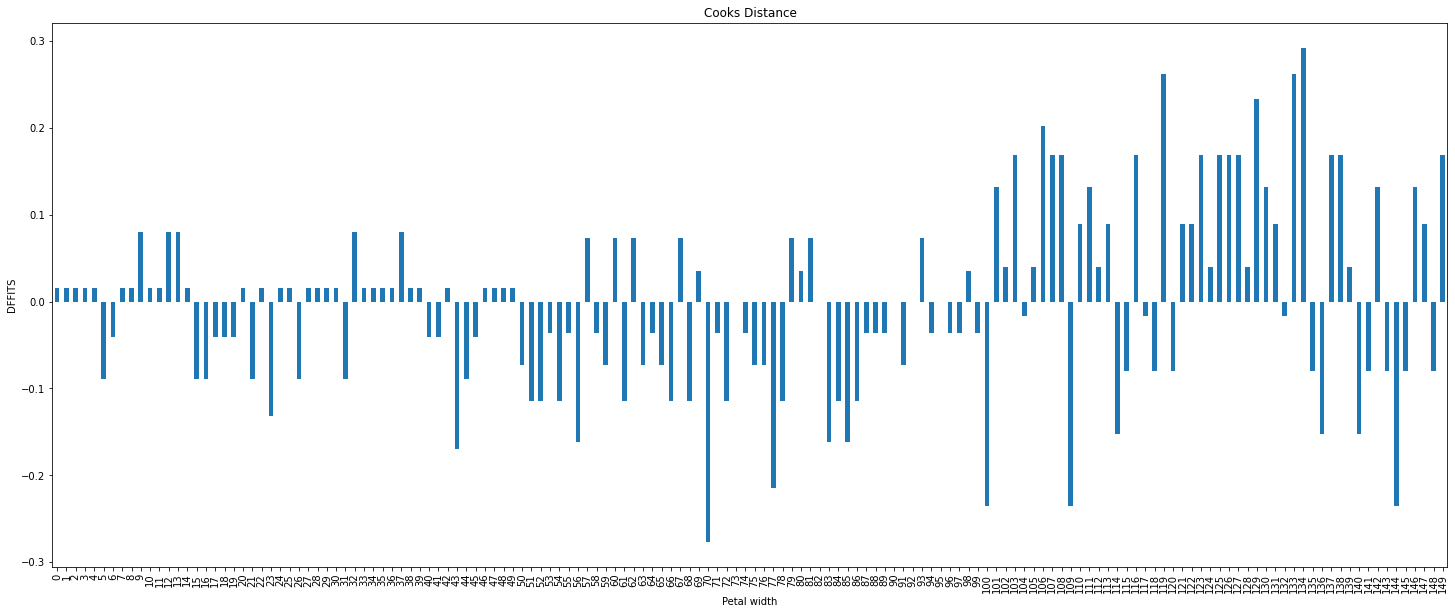

In [ ]:
plt.figure(figsize=(25,10))
plt.title("Cooks Distance")
plt.xlabel("Petal width")
plt.ylabel("DFFITS")
sm_fr.dffits.plot.bar()

In [ ]:
import math
n=150
# Here n=no. of observations =150
k=1
# Here k=no. of predictor terms =1
print("An observation is deemed influential if the absolute value of its DFFITS value > ", 2 * math.sqrt((k+2)/(n-k-2)))

An observation is deemed influential if the absolute value of its DFFITS value >  0.2857142857142857


INTERPRETATION -

The DFFITS gives us an idea of the effect of deleting a value on model parameters. The values on x axis are instances of petal width and on the y axis is the corresponding influence when the particular instance is removed.

On the basis of the thumb rules printed above, there is one value with absolute value > 0.286. 





Removing the outliers and producing a new dataframe -

In [ ]:
iris[(abs(sm_fr.dffits)>0.2857)].nunique

<bound method DataFrame.nunique of      sepal_length  sepal_width  petal_length  petal_width  Class
134           6.1          2.6           5.6          1.4      2>

In [ ]:
iris_new2 = iris[(abs(sm_fr.dffits)<=0.2857)]
iris_new2

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


INTERPRETATION -
The new dataframe contains 149 rows which means that the 1 outlier which was present is now removed.

On combining the results of Cooks distance and DFFITS, it is clear that there were total 7 outliers(134 instance is common in both). The final dataframe without outliers is as follows -

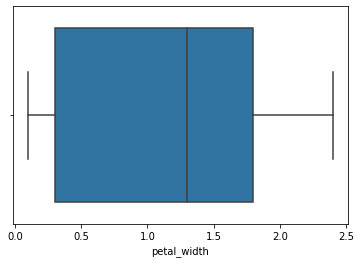

In [ ]:
import seaborn as sns
sns.boxplot(iris_new1['petal_width'])